In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
import xarray as xr
import io

In [176]:
grid_path = 'v8/wavelength_grid_map.csv'
root_path =   'output/run_v11.1.1/validation'

In [177]:
ariel_grid_tb = pd.read_csv(grid_path, delimiter=',',  index_col=0)
ariel_grid_tb = ariel_grid_tb.rename(columns={' wavelength (micrometers)':"wavelength_µm", 
                                              ' bin_width (micrometers)':"bin_width_µm"})
ariel_grid_tb.index.name = None
print(ariel_grid_tb.shape)
ariel_grid_tb.head()

(52, 2)


wavelength_µm  bin_width_µm
0       0.550000      0.100833
1       0.700000      0.204167
2       0.950000      0.307670
3       1.156375      0.113019
4       1.274903      0.124603

In [178]:
spectra_tb = pd.read_csv(f'{root_path}/data.csv', delimiter=',', skiprows=1, dtype=str)
spectra_tb.drop(index=[0,1], inplace=True)

col1 = spectra_tb.columns[0]
spectra_tb = spectra_tb.rename(columns={col1:col1[1:]})

spectra_tb.columns = spectra_tb.columns.astype(float)
spectra_tb = spectra_tb.astype(float)

spectra_tb = spectra_tb.iloc[:, ::-1]

print(spectra_tb.shape)
spectra_tb.head()

(45696, 52)


0.550000  0.700000  0.950000  1.156375  1.274903  1.405581  1.549653  \
2  0.007096  0.006979  0.007017  0.007210  0.007065  0.007566  0.007294   
3  0.002005  0.001950  0.001911  0.001940  0.001917  0.001980  0.001924   
4  0.013892  0.013797  0.013733  0.013781  0.013793  0.013748  0.013897   
5  0.000447  0.000436  0.000428  0.000432  0.000429  0.000426  0.000429   
6  0.001166  0.001143  0.001136  0.001171  0.001138  0.001184  0.001135   

   1.708493  1.883613  1.969598  ...  4.032167  4.305458  4.597272  4.908865  \
2  0.007200  0.007534  0.007530  ...  0.007206  0.007657  0.007653  0.007663   
3  0.001966  0.002039  0.002051  ...  0.001944  0.002357  0.002136  0.002058   
4  0.013815  0.013909  0.014027  ...  0.013816  0.014193  0.013898  0.013832   
5  0.000438  0.000448  0.000451  ...  0.000433  0.000464  0.000449  0.000446   
6  0.001206  0.001180  0.001176  ...  0.001175  0.001253  0.001200  0.001177   

   5.241577  5.596840  5.976181  6.381233  6.813739  7.275559  
2  0.007701  0.007756  0.007689  0.007680  0.007881  0.007789  
3  0.002039  0.002067  0.002066  0.002071  0.002102  0.002088  
4  0.013861  0.013975  0.014035  0.014064  0.014025  0.013985  
5  0.000445  0.000449  0.000451  0.000453  0.000455  0.000456  
6  0.001160  0.001177  0.001191  0.001200  0.001197  0.001247  

[5 rows x 52 columns]

In [179]:
labels_tb = pd.read_csv(f'{root_path}/labels.csv', delimiter=',', header=0)
labels_tb = labels_tb.rename(columns={'# planet_temp': 'planet_temp_k'})
# labels_tb = labels_tb.rename(lambda x: x + '_l', axis='columns') #eh this might mix up columns
labels_tb = labels_tb.rename(columns={col: col + '_l' for col in labels_tb.columns})
print(labels_tb.shape)
labels_tb.head()

(45696, 6)


planet_temp_k_l  log_H2O_l  log_CO2_l  log_CH4_l  log_CO_l  log_NH3_l
0      1180.751090  -3.868667  -7.089108  -8.027069 -3.766790  -7.198399
1       737.475875  -5.387219  -5.124206  -7.557966 -5.297041  -8.584031
2       441.127655  -8.915470  -5.277610  -6.525743 -5.766105  -5.185630
3       704.835335  -7.026701  -7.264798  -7.441234 -5.957572  -7.532014
4       443.692924  -7.837858  -5.229600  -4.231755 -4.765344  -8.854040

In [180]:
aux_full_tb = pd.read_csv(f'{root_path}/aux_full.csv', delimiter=',', header=0)
aux_full_tb = aux_full_tb.rename(columns={'# star_distance': 'star_distance',
                                          'star_temperature': 'star_temperature_k',})
aux_full_tb = aux_full_tb.rename(columns={col: col + '_a' for col in aux_full_tb.columns})
print(aux_full_tb.shape)
aux_full_tb.head()


(45696, 9)


star_distance_a  star_mass_kg_a  star_radius_m_a  star_temperature_k_a  \
0          404.201    2.273001e+30     7.509386e+08               6149.00   
1          534.788    1.391887e+30     4.661190e+08               4483.00   
2          395.398    1.502973e+30     5.704740e+08               4944.00   
3          233.131    2.423387e+30     1.106747e+09               6270.01   
4          195.439    1.491307e+30     4.730760e+08               4894.00   

   planet_mass_kg_a  planet_orbital_period_a  planet_distance_a  \
0      3.912043e+26                 6.066853           0.068068   
1      5.750940e+25                 6.029301           0.057568   
2      4.544742e+26                49.242380           0.239502   
3      7.217695e+25                52.398800           0.292721   
4      3.852940e+25                35.581001           0.192370   

   planet_radius_m_a  planet_surface_gravity_a  
0       5.883021e+07                  7.214614  
1       1.915561e+07                 10.003617  
2       6.450422e+07                  6.971775  
3       2.165198e+07                  9.826832  
4       1.510078e+07                 10.784601

In [181]:
file_path = f'{root_path}/contributions_CH4.csv'
a = pd.read_csv(file_path, delimiter=',', header=None)
a = a.iloc[:, ::-1]
a.columns = ariel_grid_tb['wavelength_µm'].values

a.head()

0.550000  0.700000  0.950000  1.156375  1.274903  1.405581  1.549653  \
0  0.006138  0.006138  0.006138  0.006141  0.006139  0.006145  0.006142   
1  0.001689  0.001689  0.001689  0.001691  0.001689  0.001693  0.001691   
2  0.012785  0.012785  0.012797  0.012860  0.012800  0.012900  0.012806   
3  0.000383  0.000383  0.000383  0.000383  0.000383  0.000384  0.000383   
4  0.001019  0.001019  0.001058  0.001110  0.001056  0.001128  0.001065   

   1.708493  1.883613  1.969597  ...  4.032167  4.305458  4.597272  4.908865  \
0  0.006160  0.006143  0.006139  ...  0.006172  0.006149  0.006143  0.006153   
1  0.001703  0.001691  0.001689  ...  0.001700  0.001693  0.001690  0.001691   
2  0.012993  0.012846  0.012789  ...  0.012928  0.012830  0.012789  0.012791   
3  0.000386  0.000383  0.000383  ...  0.000386  0.000384  0.000383  0.000383   
4  0.001149  0.001098  0.001053  ...  0.001120  0.001081  0.001041  0.001048   

   5.241577  5.596840  5.976181  6.381233  6.813739  7.275559  
0  0.006170  0.006188  0.006219  0.006246  0.006246  0.006524  
1  0.001697  0.001704  0.001714  0.001727  0.001721  0.001841  
2  0.012834  0.012897  0.012959  0.012992  0.012983  0.013199  
3  0.000385  0.000386  0.000389  0.000392  0.000390  0.000414  
4  0.001089  0.001116  0.001131  0.001140  0.001134  0.001187  

[5 rows x 52 columns]

In [182]:
species = ['CH4', 'CO', 'CO2', 'H2O', 'NH3']
species_tb = {}
for s in species:
    file_path = f'{root_path}/contributions_{s}.csv'
    species_tb[s] = pd.read_csv(file_path, delimiter=',', header=None)
    species_tb[s] = species_tb[s].iloc[:, ::-1]
    species_tb[s].columns = ariel_grid_tb['wavelength_µm'].values
    print(species_tb[s].shape)

(45696, 52)
(45696, 52)
(45696, 52)
(45696, 52)
(45696, 52)


In [183]:
print(f'ariel_grid_tb shape is {ariel_grid_tb.shape}\n with headers {ariel_grid_tb.columns}\n')
print(f'spectra_tb shape is {spectra_tb.shape}\n with headers equal to the column wavelength_µm of ariel_grid_tb\n')
print(f'labels_tb shape is {labels_tb.shape}\n with headers {labels_tb.columns}\n')
print(f'aux_full_tb shape is {aux_full_tb.shape}\n with headers {aux_full_tb.columns}\n')
print(f'there are then {len(species_tb)} species_tables stored in a dictionary with keys {species_tb.keys()} which all look like this:')
print(f'species_tb shape is {species_tb["CH4"].shape}\n with headers equal to the column wavelength_µm of ariel_grid_tb\n')


ariel_grid_tb shape is (52, 2)
 with headers Index(['wavelength_µm', 'bin_width_µm'], dtype='object')

spectra_tb shape is (45696, 52)
 with headers equal to the column wavelength_µm of ariel_grid_tb

labels_tb shape is (45696, 6)
 with headers Index(['planet_temp_k_l', 'log_H2O_l', 'log_CO2_l', 'log_CH4_l', 'log_CO_l',
       'log_NH3_l'],
      dtype='object')

aux_full_tb shape is (45696, 9)
 with headers Index(['star_distance_a', 'star_mass_kg_a', 'star_radius_m_a',
       'star_temperature_k_a', 'planet_mass_kg_a', 'planet_orbital_period_a',
       'planet_distance_a', 'planet_radius_m_a', 'planet_surface_gravity_a'],
      dtype='object')

there are then 5 species_tables stored in a dictionary with keys dict_keys(['CH4', 'CO', 'CO2', 'H2O', 'NH3']) which all look like this:
species_tb shape is (45696, 52)
 with headers equal to the column wavelength_µm of ariel_grid_tb



In [184]:


# Create a sorted list of species from dictionary keys
species_order = sorted(species_tb.keys())  # Example: ['CH4', 'CO', 'CO2', 'H2O', 'NH3']


# Combine species tables into a 3D array (samples × wavelengths × species)
species_data = np.stack([species_tb[sp].values for sp in species_order], axis=-1)

# Add 'observed' as the first species
species_list = ['observed'] + species_order
species_dataset = ['observation'] + ['contribution'] * len(species_order)

# Create the Dataset with multi-dimensional species data
ds = xr.Dataset(
    coords={
        'wavelength': ariel_grid_tb['wavelength_µm'].values,
        'sample': np.arange(spectra_tb.shape[0]),
        'species': species_list  # Add species coordinate
    }
)

# Add spectral bin widths
ds['bin_width'] = xr.DataArray(
    ariel_grid_tb['bin_width_µm'].values,
    dims=['wavelength']
)

# Reshape observed spectra to include species dimension (for 'observed')
spectra_np = spectra_tb.values.reshape(
    spectra_tb.shape[0], len(ariel_grid_tb['wavelength_µm'].values), 1
)

# Combine observed spectra with species data along the species dimension
combined_data = np.concatenate([spectra_np, species_data], axis=-1)

# Add combined species contributions with the species dimension
ds['spectra'] = xr.DataArray(
    combined_data,
    dims=['sample', 'wavelength', 'species'],
        coords={
        'species': species_list,  # Same as before
    },
)

# Add planetary parameters
for label in labels_tb.columns:
    ds[label] = xr.DataArray(
        labels_tb[label].values,
        dims=['sample'],
        attrs={'dataset': 'label'} # Add attribute to distinguish labels from auxiliary parameters
    )

# Add auxiliary parameters
for aux_param in aux_full_tb.columns:
    ds[aux_param] = xr.DataArray(
        aux_full_tb[aux_param].values,
        dims=['sample'],
        attrs={'dataset': 'auxiliary'} # Add attribute to distinguish auxiliary parameters from labels
    )

ds


<xarray.Dataset> Size: 120MB
Dimensions:                   (wavelength: 52, sample: 45696, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 366kB 0 1 2 3 ... 45693 45694 45695
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B 0.1008 0.2042 ... 0.4775
    spectra                   (sample, wavelength, species) float64 114MB 0.0...
    planet_temp_k_l           (sample) float64 366kB 1.181e+03 737.5 ... 640.1
    log_H2O_l                 (sample) float64 366kB -3.869 -5.387 ... -6.361
    log_CO2_l                 (sample) float64 366kB -7.089 -5.124 ... -4.17
    log_CH4_l                 (sample) float64 366kB -8.027 -7.558 ... -4.903
    ...                        ...
    star_temperature_k_a      (sample) float64 366kB 6.149e+03 ... 5.772e+03
    planet_mass_kg_a          (sample) float64 366kB 3.912e+26 ... 4.536e+25
    planet_orbital_period_a   (sample) float64 366kB 6.067 6.029 ... 3.234 28.68
    planet_distance_a         (sample) float64 366kB 0.06807 0.05757 ... 0.1815
    planet_radius_m_a         (sample) float64 366kB 5.883e+07 ... 1.664e+07
    planet_surface_gravity_a  (sample) float64 366kB 7.215 10.0 ... 6.517 10.46

In [185]:
ds['wavelength']

<xarray.DataArray 'wavelength' (wavelength: 52)> Size: 416B
array([0.55    , 0.7     , 0.95    , 1.156375, 1.274903, 1.405581, 1.549653,
       1.708493, 1.883613, 1.969597, 2.009186, 2.049571, 2.090767, 2.132792,
       2.175661, 2.219392, 2.264002, 2.309508, 2.355929, 2.403283, 2.451589,
       2.500866, 2.551134, 2.602411, 2.65472 , 2.70808 , 2.762512, 2.818039,
       2.874681, 2.932462, 2.991405, 3.051532, 3.112868, 3.175436, 3.239263,
       3.304372, 3.37079 , 3.438543, 3.507657, 3.578161, 3.650082, 3.723449,
       4.032167, 4.305458, 4.597272, 4.908865, 5.241577, 5.59684 , 5.976181,
       6.381233, 6.813739, 7.275559])
Coordinates:
  * wavelength  (wavelength) float64 416B 0.55 0.7 0.95 ... 6.381 6.814 7.276

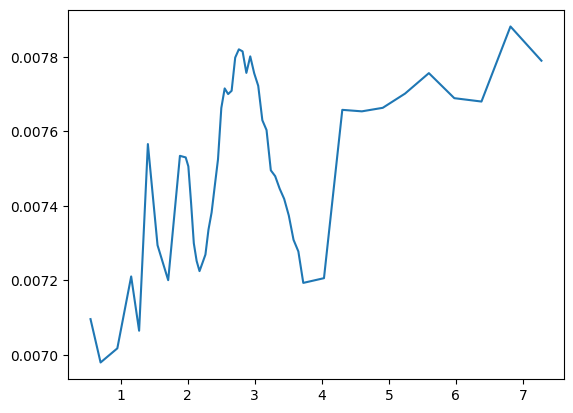

In [186]:
plt.plot(ds['wavelength'], ds['spectra'].sel(sample=0, species='observed'), label='observed')

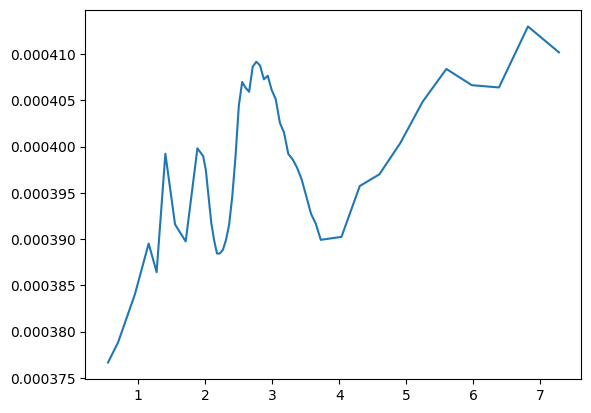

In [187]:
mean_h2o_spectrum = ds['spectra'].sel(species='H2O').mean(dim='sample')
plt.plot(ds['wavelength'], mean_h2o_spectrum, label='mean H2O contribution')

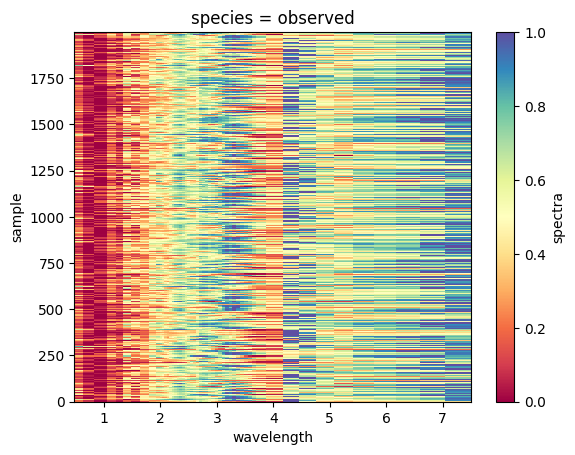

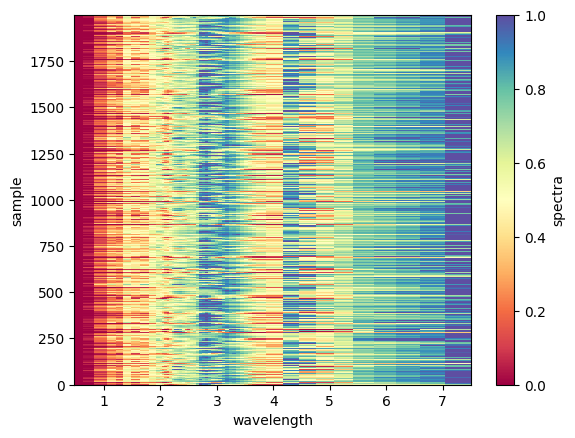

In [188]:
x = ds['spectra'].sel(species='observed') 
y = ds['spectra'].sel(species=['H2O', 'CO2', 'CH4', 'NH3']).sum(dim='species')



x = (x - x.min(dim='wavelength')) / (x.max(dim='wavelength') - x.min(dim='wavelength'))
x.sel(sample=range(2000)).plot(cmap='Spectral')
plt.figure()

y = (y - y.min(dim='wavelength')) / (y.max(dim='wavelength') - y.min(dim='wavelength'))
y.sel(sample=range(2000)).plot(cmap='Spectral')


Text(0, 0.5, 'Transit depth')

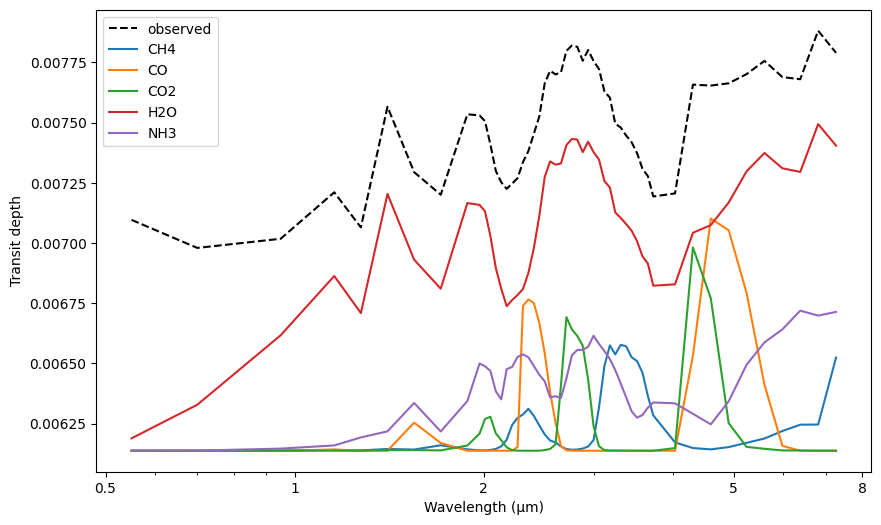

In [189]:
# Plot data
i=0
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# ax.plot(ariel_grid["wavelength_µm"] ,spectra.values[i],'k--', label='spectra')
ax.plot(ds['wavelength'], ds['spectra'].sel(sample=i, species='observed'), 'k--', label='observed')

# s = ds['species'].values
# s = s[s != 'observed']
s = (species_values := ds['species'].values)[species_values != 'observed'] # walrus operator!!? I literally never have a real excuse to use these!

ax.plot(ds['wavelength'] ,ds['spectra'].sel(sample=i, species=s), label=s)

ax.legend()
ax.set_xscale('log')

ax.set_xticks([0.5, 1, 2, 5, 8])
ax.set_xticklabels([0.5, 1, 2, 5, 8])

ax.set_xlabel('Wavelength (µm)')
ax.set_ylabel('Transit depth')


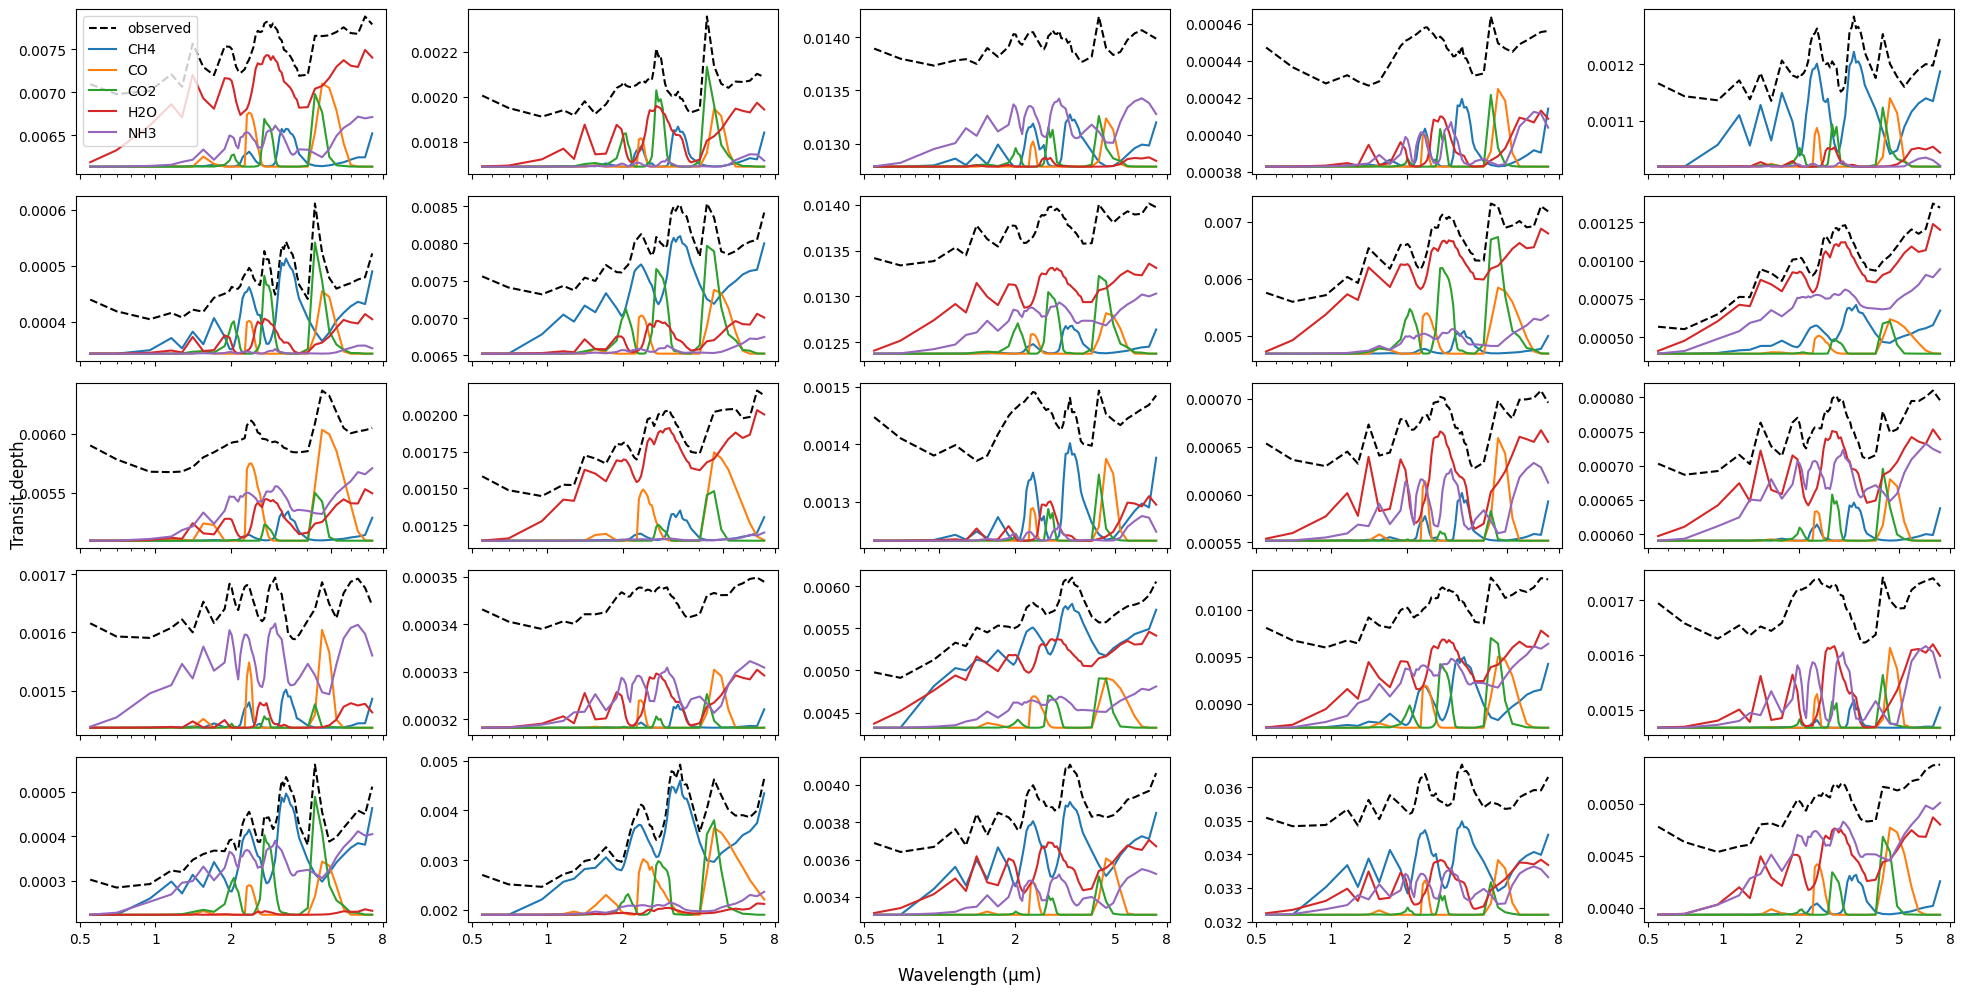

In [190]:
s = (species_values := ds['species'].values)[species_values != 'observed'] # walrus operator!!? I literally never have a real excuse to use these!
num_plots = 25
n_rows, n_cols = 5, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(ds['wavelength'], ds['spectra'].sel(sample=i, species='observed'), 'k--', label='observed')
    
    ax.plot(ds['wavelength'] ,ds['spectra'].sel(sample=i, species=s), label=s)

    ax.set_xscale('log')

axes[0].legend()

ax.set_xticks([0.5, 1, 2, 5, 8])
ax.set_xticklabels([0.5, 1, 2, 5, 8])

fig.supxlabel('Wavelength (µm)')
fig.supylabel('Transit depth')
fig.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


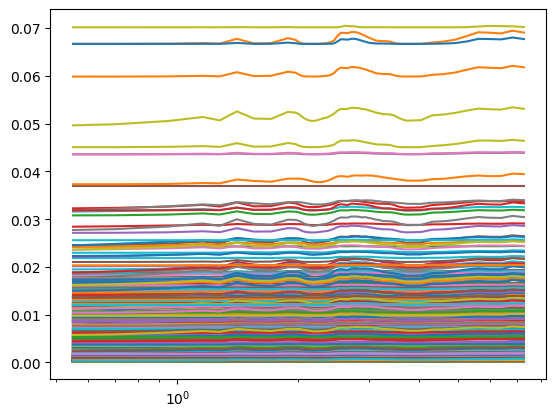

In [191]:
plt.plot(ds['wavelength'], ds['spectra'].sel(species='H2O').values[:1000].T)
plt.xscale('log')

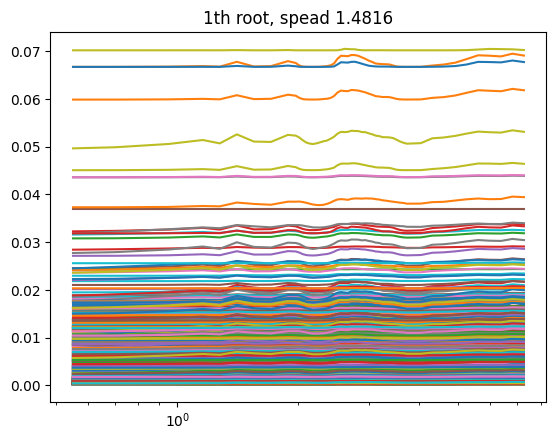

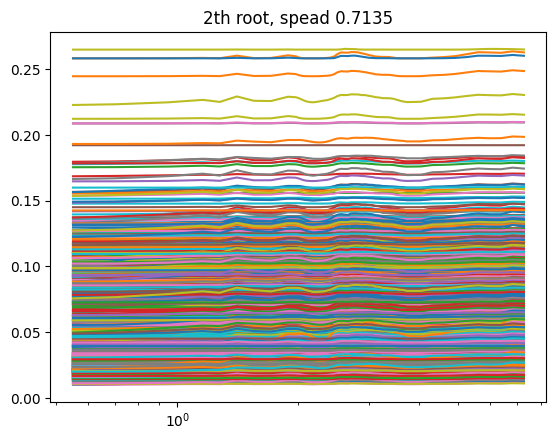

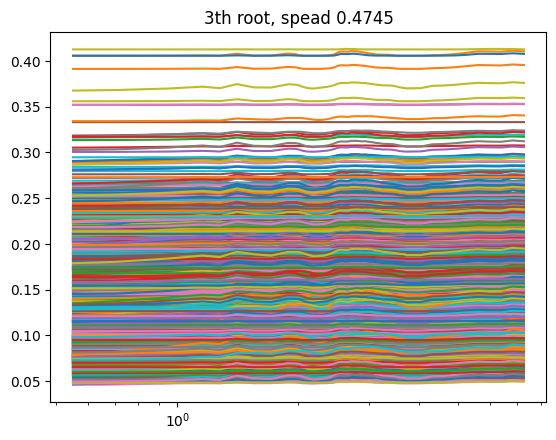

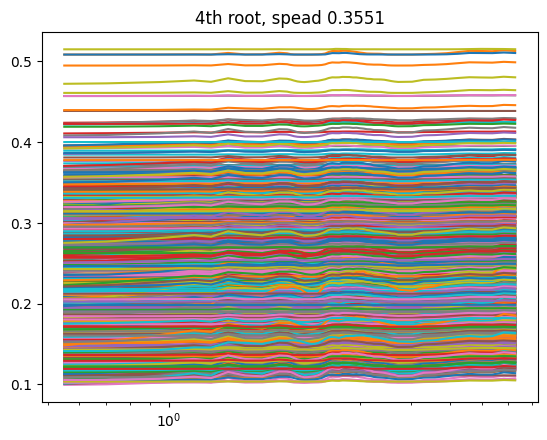

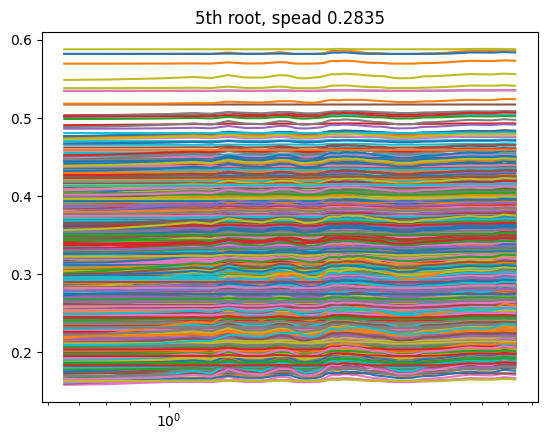

In [192]:
for n in range(1,6):
    plt.plot(ds["wavelength"], np.power((ds['spectra'].sel(species='H2O').values[:1000].T),(1/n)))
    plt.xscale('log')
    plt.title(f'{n}th root, spead {np.power((ds['spectra'].sel(species='H2O').values[:1000].T),(1/n)).std()/np.power((ds['spectra'].sel(species='H2O').values[:1000].T),(1/n)).mean():.4f}')
    plt.show()

In [193]:
# Unlog the log values in ds by 10^val
ds_natural = ds.copy()
for var in ds_natural.data_vars:
    if 'log_' in var:
        new_var = var.replace('log_', '')
        ds_natural = ds_natural.rename_vars({var: new_var})
        ds_natural[new_var] = np.power(10, ds_natural[new_var])

ds_natural

<xarray.Dataset> Size: 120MB
Dimensions:                   (wavelength: 52, sample: 45696, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 366kB 0 1 2 3 ... 45693 45694 45695
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B 0.1008 0.2042 ... 0.4775
    spectra                   (sample, wavelength, species) float64 114MB 0.0...
    planet_temp_k_l           (sample) float64 366kB 1.181e+03 737.5 ... 640.1
    H2O_l                     (sample) float64 366kB 0.0001353 ... 4.35e-07
    CO2_l                     (sample) float64 366kB 8.145e-08 ... 6.761e-05
    CH4_l                     (sample) float64 366kB 9.396e-09 ... 1.251e-05
    ...                        ...
    star_temperature_k_a      (sample) float64 366kB 6.149e+03 ... 5.772e+03
    planet_mass_kg_a          (sample) float64 366kB 3.912e+26 ... 4.536e+25
    planet_orbital_period_a   (sample) float64 366kB 6.067 6.029 ... 3.234 28.68
    planet_distance_a         (sample) float64 366kB 0.06807 0.05757 ... 0.1815
    planet_radius_m_a         (sample) float64 366kB 5.883e+07 ... 1.664e+07
    planet_surface_gravity_a  (sample) float64 366kB 7.215 10.0 ... 6.517 10.46

In [194]:
s = (species_values := ds['species'].values)[species_values != 'observed'] # walrus operator!!? I literally never have a real excuse to use these!

# Create a boolean mask for samples where at least one value in `spectra` is non-zero
sample_mask_w_contribs = ds['spectra'].sel(species=s).sum(dim=['wavelength', 'species']) != 0
ds_c = ds.sel(sample = sample_mask_w_contribs)
ds_c


<xarray.Dataset> Size: 10MB
Dimensions:                   (wavelength: 52, sample: 3781, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 30kB 0 1 2 3 ... 3778 3779 3780
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B 0.1008 0.2042 ... 0.4775
    spectra                   (sample, wavelength, species) float64 9MB 0.007...
    planet_temp_k_l           (sample) float64 30kB 1.181e+03 737.5 ... 974.9
    log_H2O_l                 (sample) float64 30kB -3.869 -5.387 ... -3.764
    log_CO2_l                 (sample) float64 30kB -7.089 -5.124 ... -8.527
    log_CH4_l                 (sample) float64 30kB -8.027 -7.558 ... -7.366
    ...                        ...
    star_temperature_k_a      (sample) float64 30kB 6.149e+03 ... 4.983e+03
    planet_mass_kg_a          (sample) float64 30kB 3.912e+26 ... 2.372e+26
    planet_orbital_period_a   (sample) float64 30kB 6.067 6.029 ... 13.73 4.532
    planet_distance_a         (sample) float64 30kB 0.06807 0.05757 ... 0.04893
    planet_radius_m_a         (sample) float64 30kB 5.883e+07 ... 4.403e+07
    planet_surface_gravity_a  (sample) float64 30kB 7.215 10.0 ... 7.272 7.811

['planet_temp_k_l', 'log_H2O_l', 'log_CO2_l', 'log_CH4_l', 'log_CO_l', 'log_NH3_l', 'star_distance_a', 'star_mass_kg_a', 'star_radius_m_a', 'star_temperature_k_a', 'planet_mass_kg_a', 'planet_orbital_period_a', 'planet_distance_a', 'planet_radius_m_a', 'planet_surface_gravity_a']


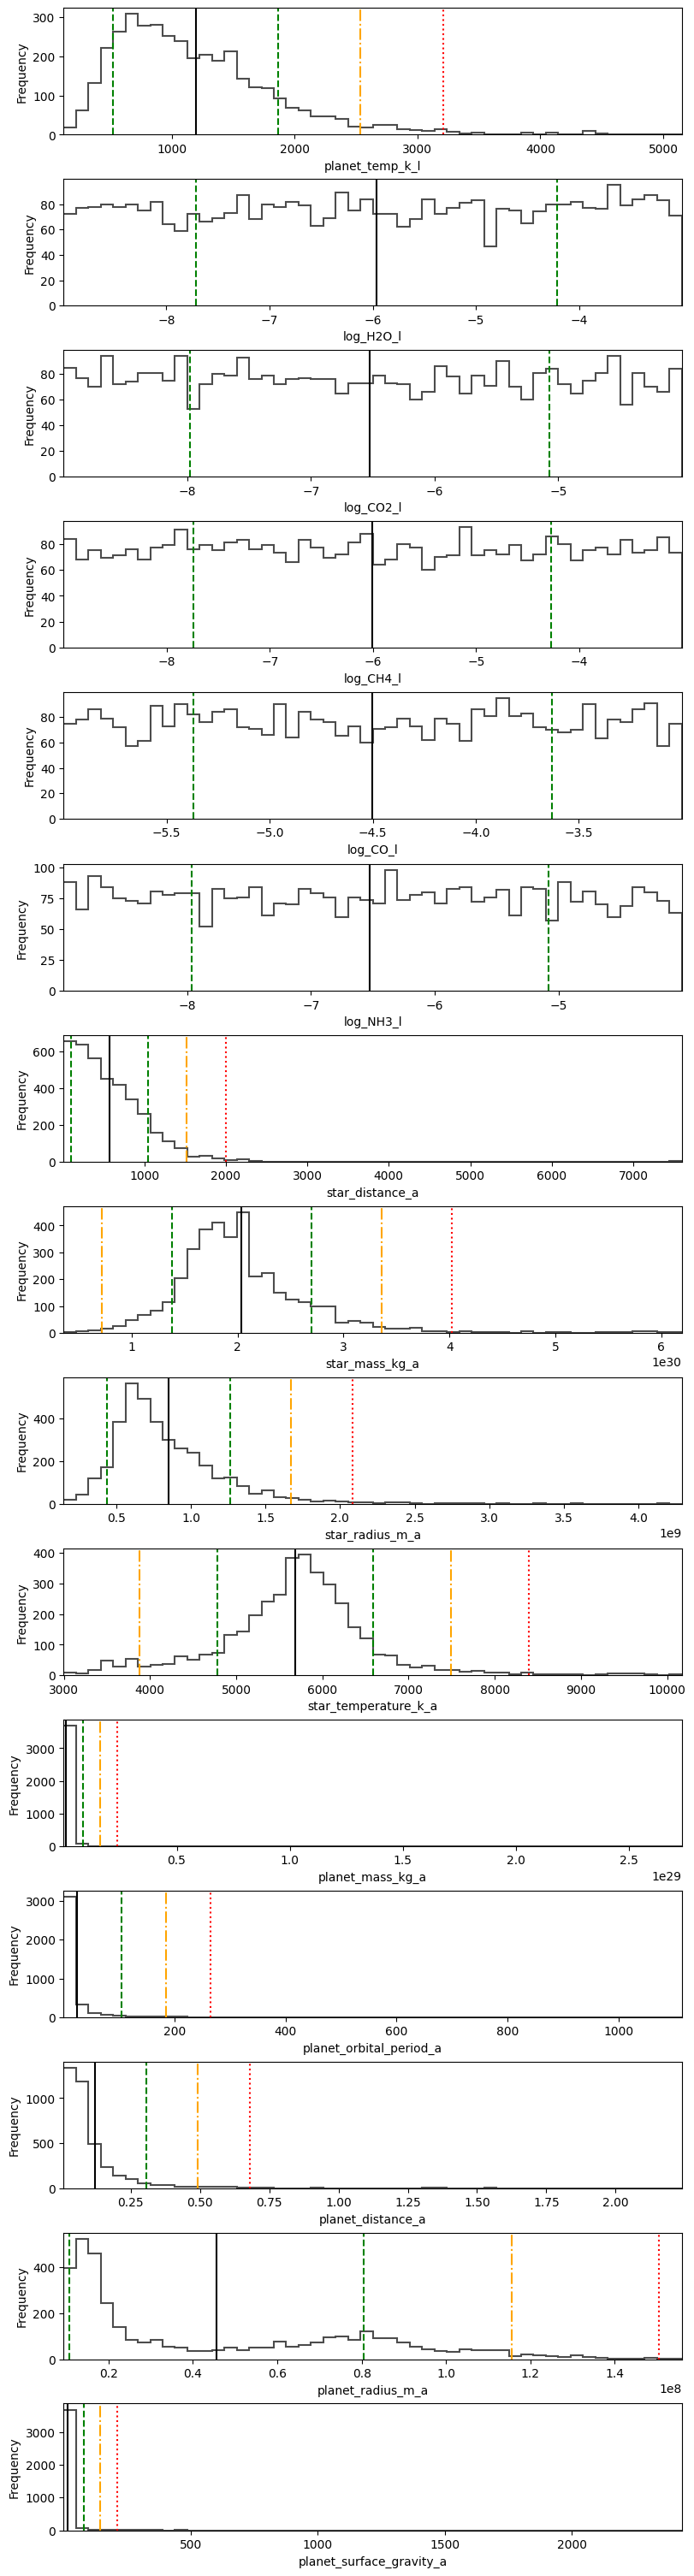

In [195]:
# List of parameters to plot (excluding `spectra`)
parameters = [var for var in ds.data_vars if var != "spectra" and var != "wavelength" and var != "bin_width"]
print(parameters)
# Create subplots
fig, axes = plt.subplots(lp:=len(parameters), 1, figsize=(8, lp * 2), constrained_layout=True)
if lp == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one parameter

for ax, param in zip(axes, parameters):
    
    data = ds_c[param].values
    ax.hist(data.flatten(), bins=50, alpha=0.7, histtype="step", color="black", linewidth=1.5)

    ax.axvline(dm:=data.mean(), color="black", linestyle="-", label="Mean") 
    ax.axvline(dm + (dstd := data.std()), color="green", linestyle="--", label="1 Std. Dev.")
    ax.axvline(dm - dstd, color="green", linestyle="--")
    ax.axvline(dm + 2 * dstd, color="orange", linestyle="-.", label="2 Std. Dev.")
    ax.axvline(dm - 2 * dstd, color="orange", linestyle="-.") 
    ax.axvline(dm + 3 * dstd, color="red", linestyle=":", label="3 Std. Dev.") 
    ax.axvline(dm - 3 * dstd, color="red", linestyle=":")

    ax.set_xlabel(param)
    ax.set_ylabel("Frequency")

    ax.set_xlim(data.min(), data.max())

plt.show()


In [196]:
parameters = [var for var in ds.data_vars if var != "spectra" and var != "wavelength" and var != "bin_width"]
ds[parameters]

<xarray.Dataset> Size: 6MB
Dimensions:                   (sample: 45696)
Coordinates:
  * sample                    (sample) int64 366kB 0 1 2 3 ... 45693 45694 45695
Data variables: (12/15)
    planet_temp_k_l           (sample) float64 366kB 1.181e+03 737.5 ... 640.1
    log_H2O_l                 (sample) float64 366kB -3.869 -5.387 ... -6.361
    log_CO2_l                 (sample) float64 366kB -7.089 -5.124 ... -4.17
    log_CH4_l                 (sample) float64 366kB -8.027 -7.558 ... -4.903
    log_CO_l                  (sample) float64 366kB -3.767 -5.297 ... -3.049
    log_NH3_l                 (sample) float64 366kB -7.198 -8.584 ... -7.722
    ...                        ...
    star_temperature_k_a      (sample) float64 366kB 6.149e+03 ... 5.772e+03
    planet_mass_kg_a          (sample) float64 366kB 3.912e+26 ... 4.536e+25
    planet_orbital_period_a   (sample) float64 366kB 6.067 6.029 ... 3.234 28.68
    planet_distance_a         (sample) float64 366kB 0.06807 0.05757 ... 0.1815
    planet_radius_m_a         (sample) float64 366kB 5.883e+07 ... 1.664e+07
    planet_surface_gravity_a  (sample) float64 366kB 7.215 10.0 ... 6.517 10.46

In [197]:
# Define a tolerance (e.g., within 10% of the mean)
abundance_tolerance = 1e-2
no_tolerance = 1e16

tolerance = {
    'planet_temp_k_l':    no_tolerance,
    'log_H2O_l':          no_tolerance,
    'log_CO2_l':          no_tolerance,
    'log_CH4_l':          abundance_tolerance,
    'log_CO_l':           no_tolerance,
    'log_NH3_l':          no_tolerance,
    'star_distance_a':    no_tolerance,
    'star_mass_kg_a':     no_tolerance,
    'star_radius_m_a':    no_tolerance,
    'star_temperature_k_a':no_tolerance,
    'planet_mass_kg_a':   no_tolerance,
    'planet_orbital_period_a':no_tolerance,
    'planet_distance_a':  no_tolerance,
    'planet_radius_m_a':  no_tolerance,
    'planet_surface_gravity_a':no_tolerance,
            }
tolerance_ds = xr.Dataset(tolerance)

targets = {
    'planet_temp_k_l': 1197.8374538093958,
    'log_H2O_l':-5.994919167786353,
    'log_CO2_l': -6.499649943854283,
    'log_CH4_l': -4,#-6.001007899837979,
    'log_CO_l': -4.496589021501109,
    'log_NH3_l': -6.491720080880544,
    'star_distance_a': 568.2065020332558,
    'star_mass_kg_a': 2.0357949035406833e+30,
    'star_radius_m_a': 855078079.4802036,
    'star_temperature_k_a': 5672.084205905214,
    'planet_mass_kg_a': 1.1245086149027514e+27,
    'planet_orbital_period_a': 24.335250716885003,
    'planet_distance_a': 0.11941006826573485,
    'planet_radius_m_a': 44984908.31604669,
    'planet_surface_gravity_a': 16.67067211510088
}
targets_ds = xr.Dataset(targets)

In [198]:
targets_ds

<xarray.Dataset> Size: 120B
Dimensions:                   ()
Data variables: (12/15)
    planet_temp_k_l           float64 8B 1.198e+03
    log_H2O_l                 float64 8B -5.995
    log_CO2_l                 float64 8B -6.5
    log_CH4_l                 int64 8B -4
    log_CO_l                  float64 8B -4.497
    log_NH3_l                 float64 8B -6.492
    ...                        ...
    star_temperature_k_a      float64 8B 5.672e+03
    planet_mass_kg_a          float64 8B 1.125e+27
    planet_orbital_period_a   float64 8B 24.34
    planet_distance_a         float64 8B 0.1194
    planet_radius_m_a         float64 8B 4.498e+07
    planet_surface_gravity_a  float64 8B 16.67

In [199]:

# Compute the mean for all parameters
# mean_planet = ds[parameters].mean(dim="sample")

# Compute the relative difference for all parameters and check if within tolerance
relative_diff = np.abs(np.abs(ds_c[parameters]) - np.abs(targets_ds)) / np.abs(targets_ds)
within_tolerance = (relative_diff <= tolerance_ds).to_array().all(dim="variable")

# Use the mask to subset the dataset
reduced_ds = ds_c.sel(sample=within_tolerance)

# Print or inspect the resulting subset dataset
reduced_ds


<xarray.Dataset> Size: 127kB
Dimensions:                   (wavelength: 52, sample: 48, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 384B 21 227 324 ... 3692 3748 3759
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B 0.1008 0.2042 ... 0.4775
    spectra                   (sample, wavelength, species) float64 120kB 0.0...
    planet_temp_k_l           (sample) float64 384B 3.855e+03 547.6 ... 1.08e+03
    log_H2O_l                 (sample) float64 384B -8.456 -4.921 ... -7.45
    log_CO2_l                 (sample) float64 384B -6.569 -6.391 ... -6.814
    log_CH4_l                 (sample) float64 384B -4.003 -4.029 ... -3.974
    ...                        ...
    star_temperature_k_a      (sample) float64 384B 5.635e+03 ... 4.985e+03
    planet_mass_kg_a          (sample) float64 384B 4.348e+26 ... 2.335e+26
    planet_orbital_period_a   (sample) float64 384B 0.4008 39.31 ... 12.82 3.185
    planet_distance_a         (sample) float64 384B 0.01028 0.224 ... 0.04014
    planet_radius_m_a         (sample) float64 384B 6.276e+07 ... 3.936e+07
    planet_surface_gravity_a  (sample) float64 384B 7.046 10.04 ... 14.31 9.618

In [200]:
# List of parameters to plot (excluding `spectra`)
parameters = [var for var in ds_c.data_vars if var != "spectra" and var != "wavelength" and var != "bin_width"]
print(parameters)
# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(8, len(parameters) * 2), constrained_layout=True, dpi=500)
if len(parameters) == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one parameter

for ax, param in zip(axes, parameters):
    data = ds_c[param].values
    
    ax.hist(data.flatten(), bins=50, alpha=0.7, histtype="step", color="black", linewidth=1.5, label = "all data")

    ax.axvline(data.mean(), color="black", linestyle="-", label="Mean") 
    ax.axvline(data.mean() + data.std(), color="green", linestyle="--", label="1 Std. Dev.")
    ax.axvline(data.mean() - data.std(), color="green", linestyle="--")
    ax.axvline(data.mean() + 2 * data.std(), color="orange", linestyle="-.", label="2 Std. Dev.")
    ax.axvline(data.mean() - 2 * data.std(), color="orange", linestyle="-.") 
    ax.axvline(data.mean() + 3 * data.std(), color="red", linestyle=":", label="3 Std. Dev.") 
    ax.axvline(data.mean() - 3 * data.std(), color="red", linestyle=":")

    data_sub = reduced_ds[param].values
    ax2 = ax.twinx()
    ax2.hist(data_sub.flatten(), bins=30, alpha=1, color="blue", linewidth=1.5, label="mean subset")

    ax.set_xlabel(param)
    ax.set_ylabel("Frequency")

    ax.set_xlim(data.min(), data.max())
axes[0].legend()
plt.show()

['planet_temp_k_l', 'log_H2O_l', 'log_CO2_l', 'log_CH4_l', 'log_CO_l', 'log_NH3_l', 'star_distance_a', 'star_mass_kg_a', 'star_radius_m_a', 'star_temperature_k_a', 'planet_mass_kg_a', 'planet_orbital_period_a', 'planet_distance_a', 'planet_radius_m_a', 'planet_surface_gravity_a']


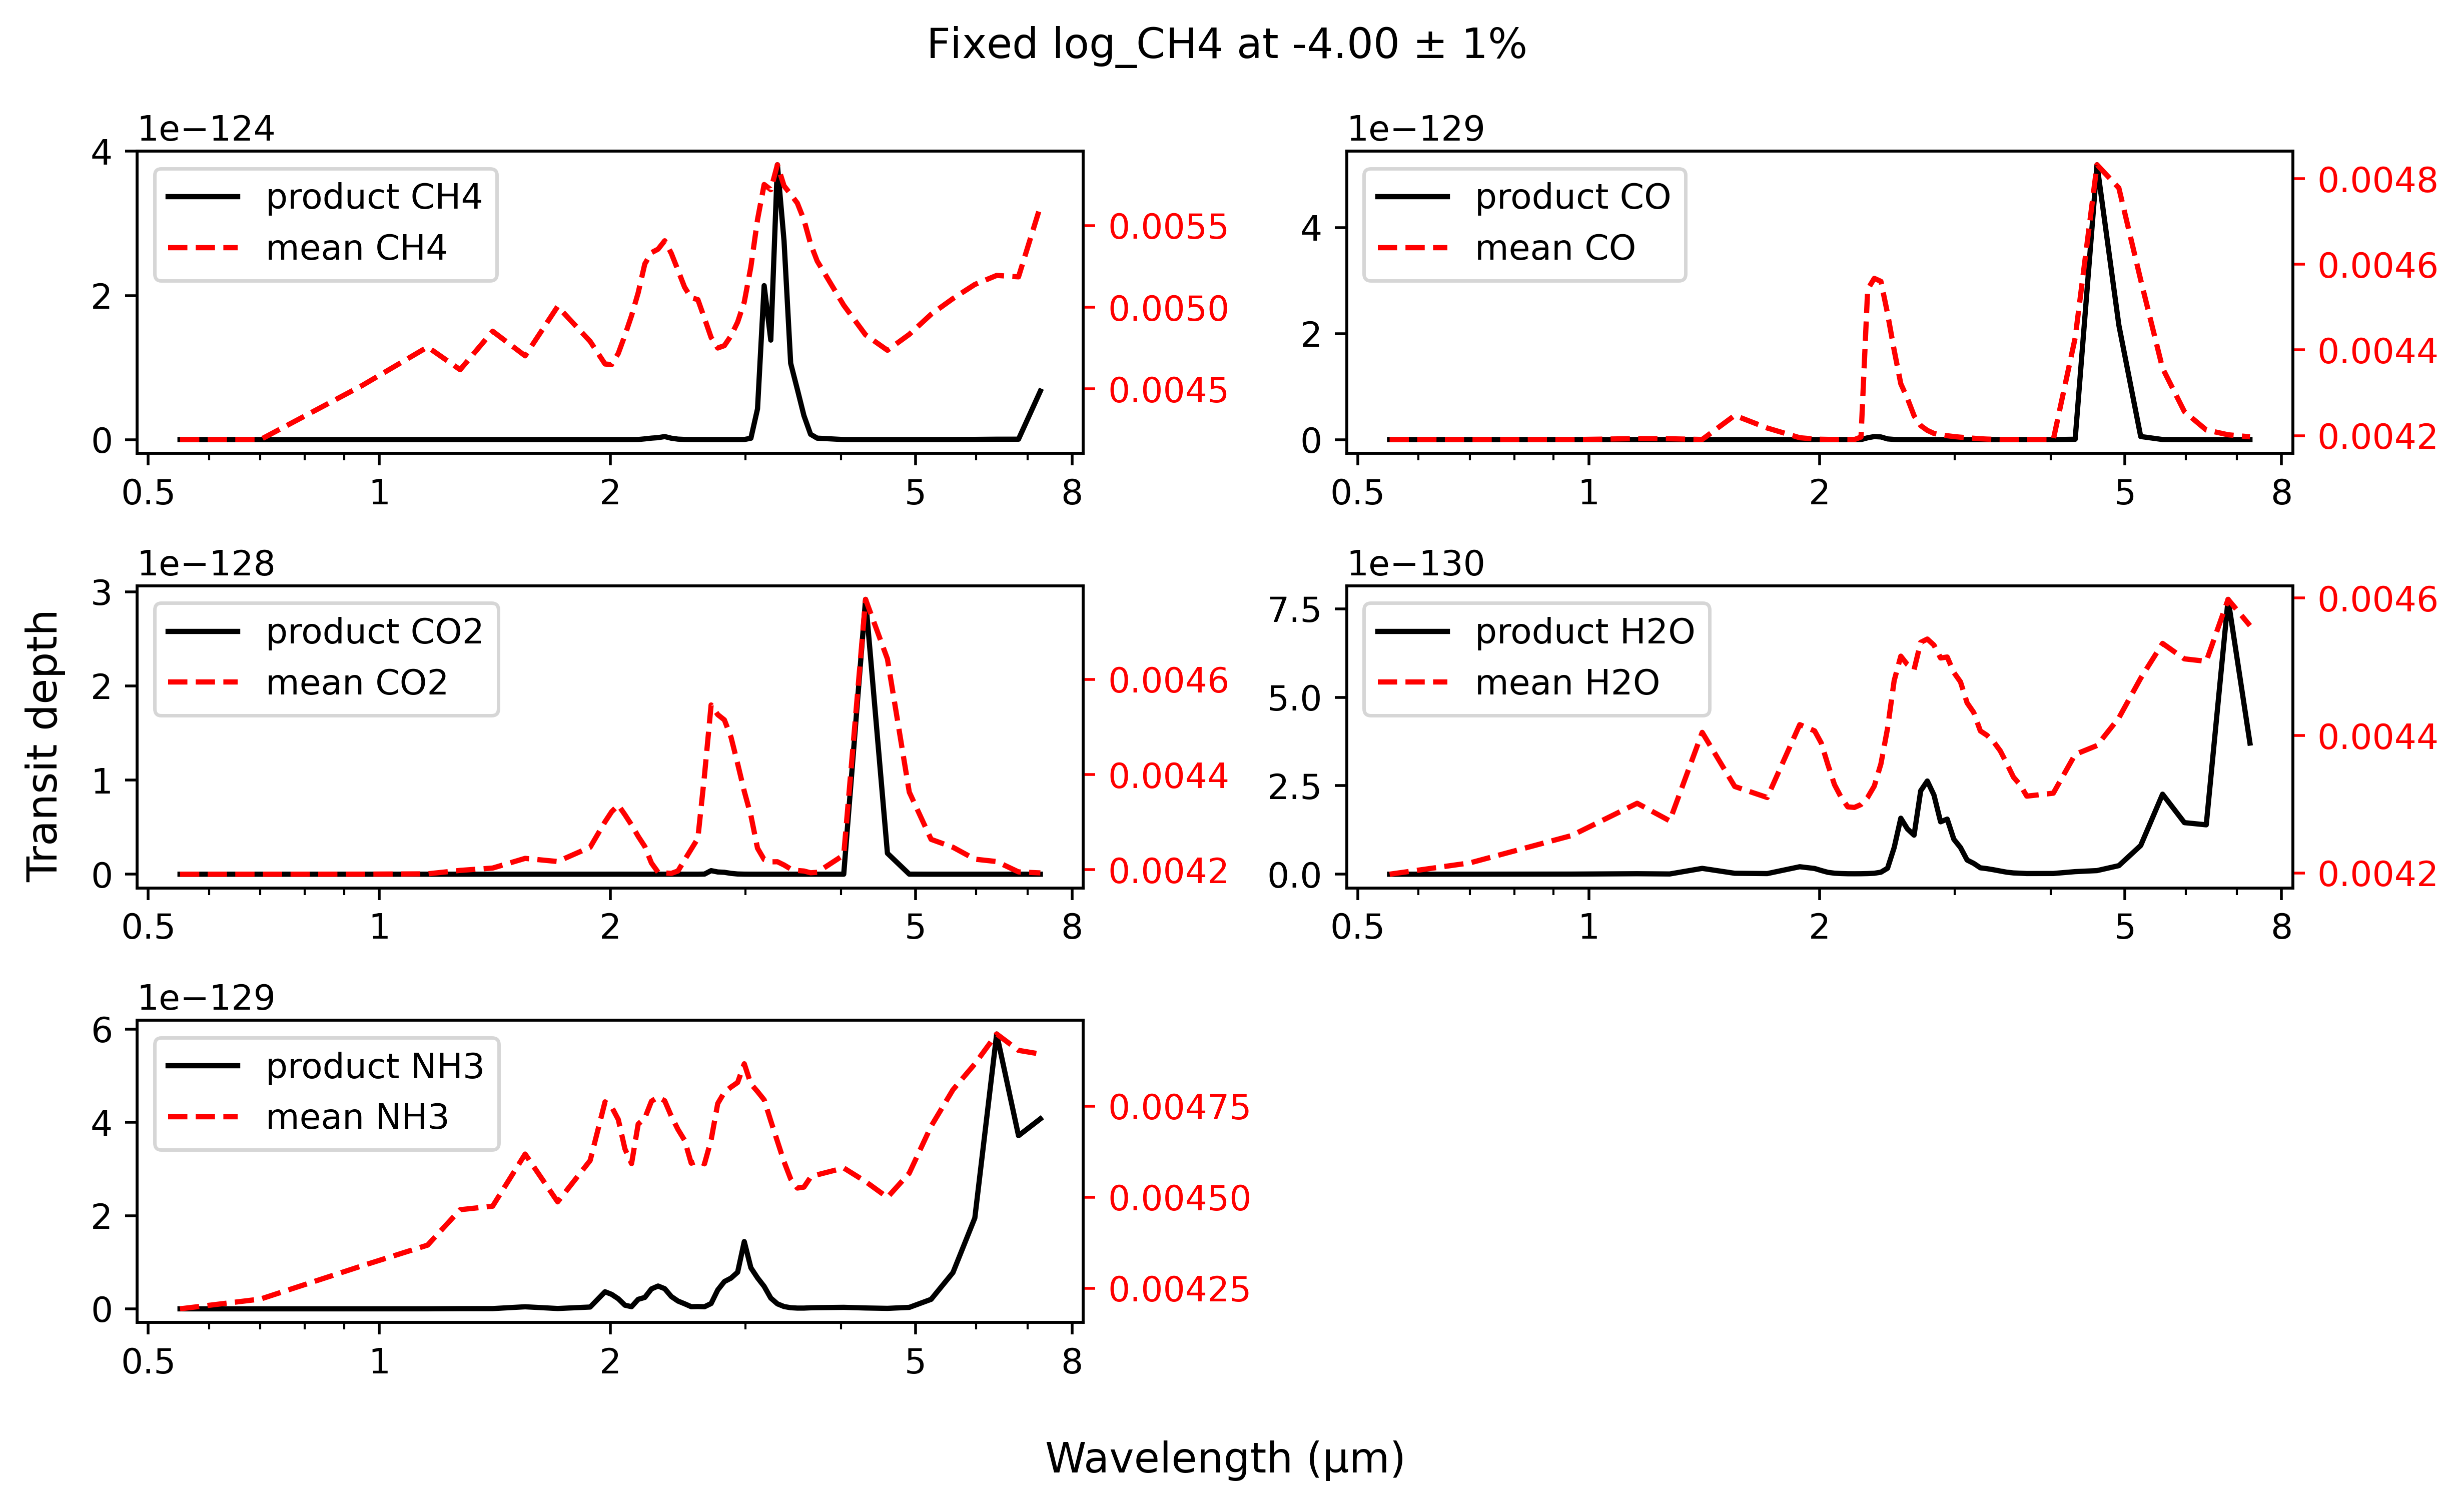

In [201]:
s = (species_values := reduced_ds['species'].values)[species_values != 'observed'] # walrus operator!!? I literally never have a real excuse to use these!
num_plots = 5
n_rows, n_cols = 3, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6), dpi=500)
axes = axes.flatten()

fig.suptitle(f'Fixed log_CH4 at {reduced_ds["log_CH4_l"].mean().values:.2f} {r'$\pm$'} {tolerance_ds["log_CH4_l"].values*100:.0f}%')

for i, ax in enumerate(axes[:num_plots]):
    # ax.plot(reduced_ds['wavelength'] ,reduced_ds['spectra'].sel(species=s[i]).mean(dim='sample'), label=s[i])
    # ax.fill_between(reduced_ds['wavelength'], 
    #                 (rdsm:= (rds := reduced_ds['spectra'].sel(species=s[i])).mean(dim='sample')) - (rdss := rds.std(dim='sample')),
    #                 rdsm + rdss,
    #                 alpha=0.2)
    ax.plot(reduced_ds['wavelength'], 
            reduced_ds['spectra'].sel(species=s[i]).prod(dim='sample'), 
            'k-',
            label=f'product {s[i]}')
    
    ax2 = ax.twinx()
    ax2.plot(reduced_ds['wavelength'], 
            reduced_ds['spectra'].sel(species=s[i]).mean(dim='sample'), 
            'r--',
            label=f'mean {s[i]}')
    ax2.tick_params(axis='y', colors='red')
    
    
    ax.set_xscale('log')
    # ax.set_ylabel(s[i])

    ax.set_xticks([0.5, 1, 2, 5, 8])
    ax.set_xticklabels([0.5, 1, 2, 5, 8])
    # create one legend for all twin axis
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='best')
    

axes[-1].axis('off')

fig.supxlabel('Wavelength (µm)')
fig.supylabel('Transit depth')
fig.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [202]:
# lets save the dataset we have created into a netcdf file

ds.to_netcdf('ariel_data.nc')


In [203]:
# and load it back into xarray and verify it is the same

ds2 = xr.open_dataset('ariel_data.nc')
ds2

<xarray.Dataset> Size: 120MB
Dimensions:                   (wavelength: 52, sample: 45696, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 366kB 0 1 2 3 ... 45693 45694 45695
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B ...
    spectra                   (sample, wavelength, species) float64 114MB ...
    planet_temp_k_l           (sample) float64 366kB ...
    log_H2O_l                 (sample) float64 366kB ...
    log_CO2_l                 (sample) float64 366kB ...
    log_CH4_l                 (sample) float64 366kB ...
    ...                        ...
    star_temperature_k_a      (sample) float64 366kB ...
    planet_mass_kg_a          (sample) float64 366kB ...
    planet_orbital_period_a   (sample) float64 366kB ...
    planet_distance_a         (sample) float64 366kB ...
    planet_radius_m_a         (sample) float64 366kB ...
    planet_surface_gravity_a  (sample) float64 366kB ...

In [204]:
ds2.equals(ds)

True

In [206]:
# now save the dataset into a hdf5 file

ds.to_netcdf('ariel_data.hdf5')

In [208]:
ds3 = xr.open_dataset('ariel_data.hdf5')
ds3

<xarray.Dataset> Size: 120MB
Dimensions:                   (wavelength: 52, sample: 45696, species: 6)
Coordinates:
  * wavelength                (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                    (sample) int64 366kB 0 1 2 3 ... 45693 45694 45695
  * species                   (species) <U8 192B 'observed' 'CH4' ... 'NH3'
Data variables: (12/17)
    bin_width                 (wavelength) float64 416B ...
    spectra                   (sample, wavelength, species) float64 114MB ...
    planet_temp_k_l           (sample) float64 366kB ...
    log_H2O_l                 (sample) float64 366kB ...
    log_CO2_l                 (sample) float64 366kB ...
    log_CH4_l                 (sample) float64 366kB ...
    ...                        ...
    star_temperature_k_a      (sample) float64 366kB ...
    planet_mass_kg_a          (sample) float64 366kB ...
    planet_orbital_period_a   (sample) float64 366kB ...
    planet_distance_a         (sample) float64 366kB ...
    planet_radius_m_a         (sample) float64 366kB ...
    planet_surface_gravity_a  (sample) float64 366kB ...

In [211]:
ds3.equals(ds)

True

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

ds_c = xr.open_dataset('contribution_22_checkpoint_backup_10830.hdf5')

In [3]:
ds_c

<xarray.Dataset> Size: 329MB
Dimensions:                 (wavelength: 52, sample: 91392, parameter: 6,
                             quartile: 3, species: 5)
Coordinates:
  * wavelength              (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                  (sample) int64 731kB 0 1 2 3 ... 91389 91390 91391
  * parameter               (parameter) <U13 312B 'planet_temp_k' ... 'log_NH3'
  * quartile                (quartile) <U2 24B 'q1' 'q2' 'q3'
  * species                 (species) <U3 60B 'H2O' 'CO2' 'CH4' 'CO' 'NH3'
Data variables: (12/22)
    bin_width               (wavelength) float64 416B ...
    spectrum                (sample, wavelength) float64 38MB ...
    noise                   (sample, wavelength) float64 38MB ...
    planet_temp_k           (sample) float64 731kB ...
    log_H2O                 (sample) float64 731kB ...
    log_CO2                 (sample) float64 731kB ...
    ...                      ...
    planet_radius_m         (sample) float64 731kB ...
    planet_surface_gravity  (sample) float64 731kB ...
    valid_quartiles         (sample) bool 91kB ...
    parameter_quartiles     (sample, parameter, quartile) float64 13MB ...
    contributions           (sample, species, wavelength) float64 190MB ...
    clean_forward_model     (sample, wavelength) float64 38MB ...

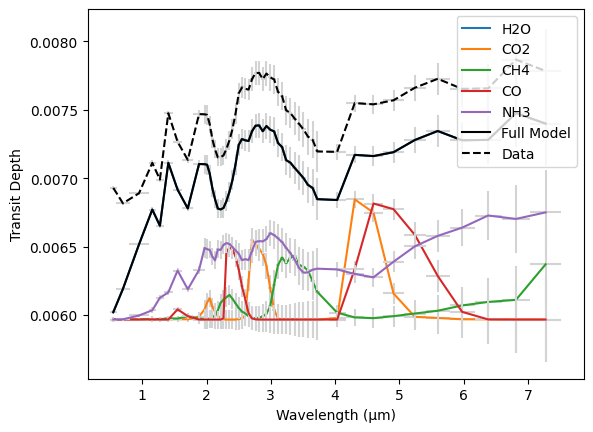

In [19]:
n=1090

for s in ds_c['species'].values:
    plt.errorbar(x = ds_c['wavelength'],
                y = ds_c['contributions'].loc[dict(sample=n, species=s)],
                xerr=ds_c['bin_width']/2,
                yerr=ds_c['noise'].sel(sample = n),
                fmt=' ', color='lightgrey')
    plt.plot(ds_c['wavelength'],
         ds_c['contributions'].loc[dict(sample=n, species=s)],
           label=s)
    
plt.plot(ds_c['wavelength'],
         ds_c['clean_forward_model'].loc[dict(sample=n)], label='Full Model', color='black')

plt.errorbar(x = ds_c['wavelength'],
            y = ds_c['spectrum'].sel(sample=n),
            xerr=ds_c['bin_width']/2,
            yerr=ds_c['noise'].sel(sample=n),
            fmt=' ', color='lightgrey')
plt.plot(ds_c['wavelength'], 
         ds_c['spectrum'].sel(sample=n), 
        "--k", label='Data', )

plt.xlabel('Wavelength (µm)')
plt.ylabel('Transit Depth')
    
plt.legend()